### IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline
from scipy import stats

## Description


**Private**: A factor with levels No and Yes indicating private or public university
**Apps**: Number of applications received
**Accept**: Number of applications accepted
**Enroll**: Number of new students enrolled
**Top10perc**: Pct. new students from top 10% of H.S. class
**Top25perc**: Pct. new students from top 25% of H.S. class
**F.Undergrad**: Number of fulltime undergraduates
**P.Undergrad**; Number of parttime undergraduates
**Outstate**: Out-of-state tuition
**Room.Board**: Room and board costs
**Books**: Estimated book costs
**Personal**: Estimated personal spending
**PhD**: Pct. of faculty with Ph.D.’s
**Terminal**: Pct. of faculty with terminal degree
**S.F.Ratio**: Student/faculty ratio
**perc.alumni**: Pct. alumni who donate
**Expend**: Instructional expenditure per student
**Grad.Rate**: Graduation rate

In [2]:
df=pd.read_csv('college.csv')

In [3]:
dfc=df.copy()
dfc

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [4]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

There are no null values in any column.

In [5]:
dfc.drop_duplicates()
dfc.shape

(777, 19)

Hence, there are no duplicate rows.

In [6]:
dfc.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


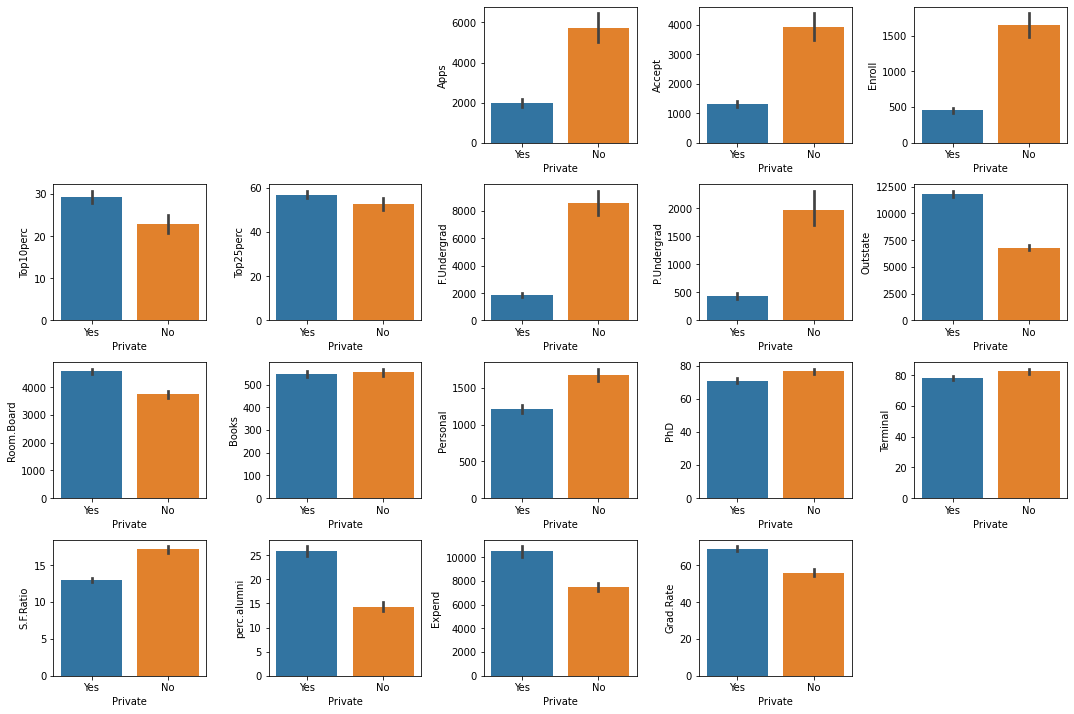

In [7]:
plt.figure(figsize=(15,10))
for i,col in enumerate(dfc.columns):
    if dfc[col].dtype != 'object':
        ax = plt.subplot(4, 5, i+1)
        sns.barplot(x='Private',y=col,data=dfc, ax=ax)
plt.tight_layout(pad=1)
plt.show()

**Insights:**
1. Most of the students study in public colleges according to applications and students enrolled.
2. Toppers generally prefer Private colleges.
3. Approximately 1/4th students are part time graduated.
4. Private college students take out of state tuitions and have high room and board costs.
5. Books of both public and private colleges costs approximately same.
6. In private, alumni donate more and the instructional expenditure on students is also high 
7. The graduation rate of private colleges is also higher.

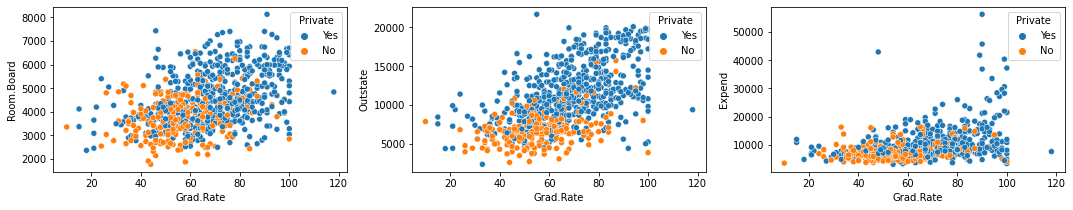

In [8]:
columns=['Room.Board','Outstate','Expend']
plt.figure(figsize=(15,3))
for i,col in enumerate(columns):
    ax = plt.subplot(1,3, i+1)
    sns.scatterplot(y=col,x='Grad.Rate',hue='Private',data=dfc,ax=ax)
plt.tight_layout(pad=1)
plt.show()

**Here we see there is a blue point which shows graduation rate approximately 120 percent which does not make any sense.**

* Also, when the room board cost,expenditure on students increases graduation rate also increases.

In [9]:
# Dropping the rows which has graduation rate greater than 100%
dfc.drop(dfc[dfc['Grad.Rate']>100].index,inplace=True)
dfc.shape

(776, 19)

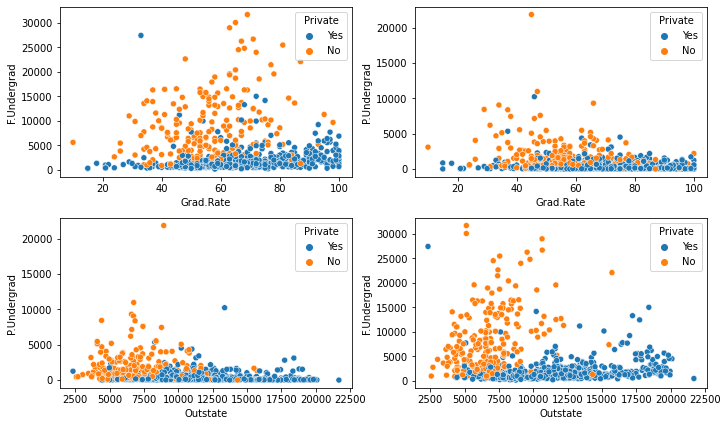

In [10]:
fig,axes = plt.subplots(2,2,figsize=(10,6))
sns.scatterplot(y='F.Undergrad',x='Grad.Rate',hue='Private',data=dfc,ax=axes[0,0])
sns.scatterplot(y='P.Undergrad',x='Grad.Rate',hue='Private',data=dfc,ax=axes[0,1])
sns.scatterplot(y='F.Undergrad',x='Outstate',hue='Private',data=dfc,ax=axes[1,1])
sns.scatterplot(y='P.Undergrad',x='Outstate',hue='Private',data=dfc,ax=axes[1,0])
plt.tight_layout(pad=1)

* Tuitions tends to be much higher for private schools in both part time and full time graduation.
* Part time or full time undergrad is not much affecting the graduation rate but private colleges have good graduation rate. 

In [11]:
# dropping the row which has negative value in any column because there is no such column which can hold negative value.
# applications, enrolled students and charges nothing make sense if it has negative value.
for i,col in enumerate(dfc.columns):
    if dfc[col].dtype!='object':
        dfc.drop(dfc[dfc[col]<0].index,inplace=True)
dfc.shape

(776, 19)

In [12]:
#Dropping unnecessary column
dfc.drop(['Unnamed: 0'],axis=1,inplace=True)
dfc.shape

(776, 18)

<AxesSubplot:>

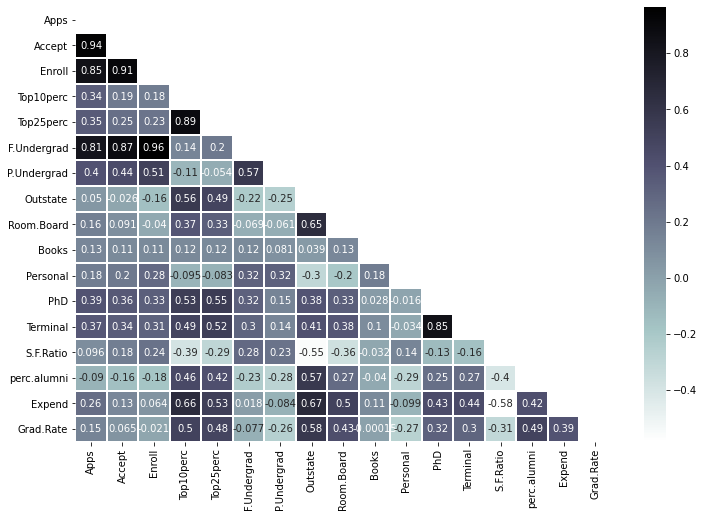

In [13]:
plt.figure(figsize=(12,8))
mask =  np.triu(np.ones_like(dfc.corr()))
sns.heatmap(dfc.corr(),mask=mask,annot=True,cmap='bone_r',linewidth=0.2)

Insights:
* Enroll and F.Undergrad are higly correlated with Apps and also with Accept.
* Also, F.Undergrad is highly highly correlated with Enroll.
* Top25perc and Top10perc are highly correlated and Terminal and PhD are also highly correlated with each other.

In [14]:
def change(i):
    if i == 'Yes':
        return 1
    else:
        return 0
    
dfc['Private']=dfc['Private'].apply(change)
dfc.head(3)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54


* If Private = 1 then its a private college and if 0 its a public college.

### Standard Scaling

In [15]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#scaler.fit(dfc)
#dfc_scaled = scaler.transform(dfc)

### PCA

In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
dfc_pca = pca.fit_transform(dfc)
dfc_pca.shape

(776, 2)

### KMeans

Text(0, 0.5, 'WCSS')

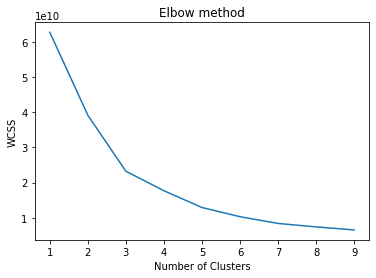

In [17]:
from sklearn.cluster import KMeans
kmeans = [KMeans(n_clusters=k, random_state=23).fit(dfc_pca) for k in range (1, 10)]
innertia = [model.inertia_ for model in kmeans]
plt.plot(range(1, 10), innertia)
plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

Elbow seems to be at 3

Text(0, 0.5, 'Silhoutte score')

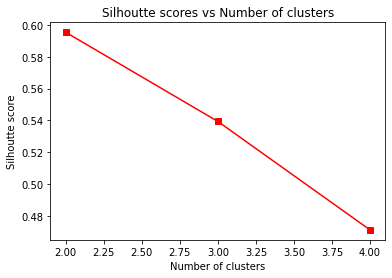

In [18]:
from sklearn.metrics import silhouette_score,silhouette_samples
silhoutte_score = [silhouette_score(dfc_pca,model.labels_) for model in kmeans[1:4]]
plt.plot(range(2,5), silhoutte_score, "rs-")
plt.title('Silhoutte scores vs Number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte score')

The silhouette value is found highest for clusters=2.

For n_clusters = 2 
The average silhouette_score is : 0.5953608419319373
For n_clusters = 3 
The average silhouette_score is : 0.5393341424945216


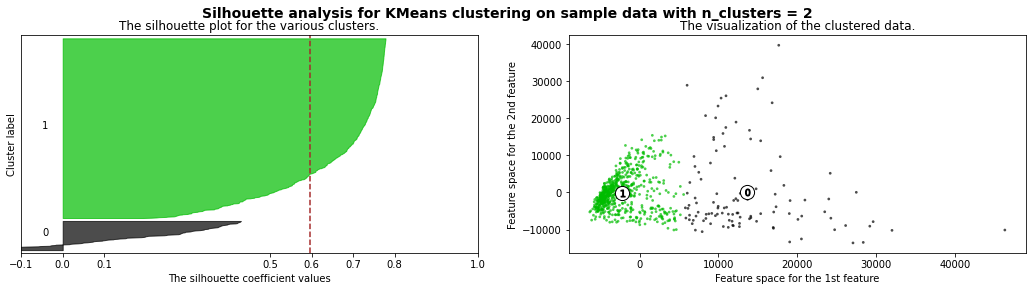

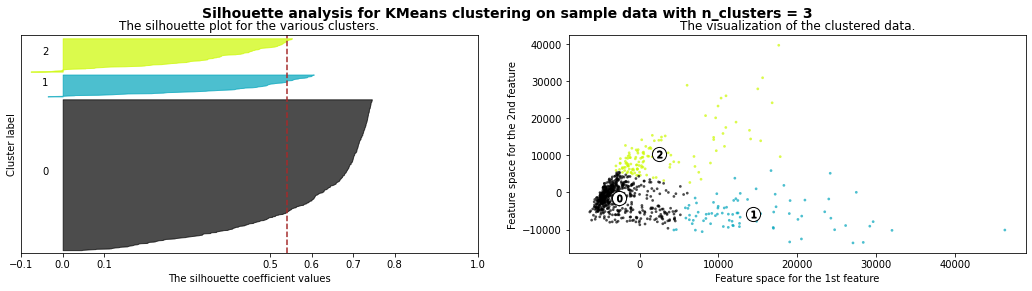

In [19]:
import matplotlib.cm as cm
for n_clusters in range (2,4):
    fig,(ax1,ax2)= plt.subplots(1,2,figsize=(18,4))
    ax1.set_xlim([-0.1, 1])    
    ax1.set_ylim([0, len(dfc_pca)+(n_clusters+1)*10])  #The (n_clusters+1)*10 is for inserting blank space between silhouette.
    km = KMeans(n_clusters=n_clusters, random_state=23)
    km_labels = km.fit_predict(dfc_pca)
    sl_score=silhouette_score(dfc_pca,km_labels)
    print("For n_clusters =", n_clusters,"\nThe average silhouette_score is :", sl_score)
    sample_silhouette_values = silhouette_samples(dfc_pca, km_labels) # Compute the silhouette scores for each sample

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = \
                        sample_silhouette_values[km_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower,y_upper),0,ith_cluster_silhouette_values,facecolor=color,edgecolor=color,alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i)) #Label silhouette plots with their cluster no.s at the middle
        y_lower = y_upper + 10  # 10 for the 0 samples # Compute the new y_lower for next plot

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=sl_score, color="brown", linestyle="--") # The vertical line for average silhouette score of all the values
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1,0.0,0.1,0.5, 0.6, 0.7, 0.8,1.0])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(km_labels.astype(float) / n_clusters)
    ax2.scatter(dfc_pca[:,0],dfc_pca[:,1], marker='.', s=30, lw=0, alpha=0.7,c=colors, edgecolor='k')

    # Labeling the clusters
    centers = km.cluster_centers_
    ax2.scatter(centers[:, 0],centers[:, 1],marker='o',c="white",alpha=1,s=200,edgecolor='k') #white circles at cluster centers

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()


In [20]:
km=KMeans(n_clusters=2, random_state=23)
km.fit(dfc_pca)

KMeans(n_clusters=2, random_state=23)

### Heirarchical Clustering (Agglomerative)

Text(0, 0.5, 'Euclidean Distance')

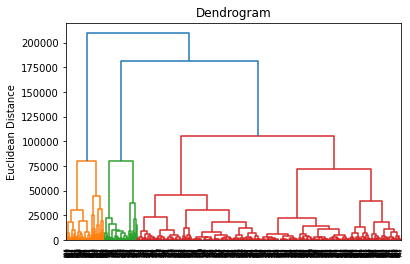

In [21]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram , linkage

lin=linkage(dfc_pca,method='ward')
dgram=dendrogram(lin)
plt.title('Dendrogram')
plt.ylabel('Euclidean Distance')

For n_clusters = 2 
The average silhouette_score is : 0.5599139231970977
For n_clusters = 3 
The average silhouette_score is : 0.5624123381876404


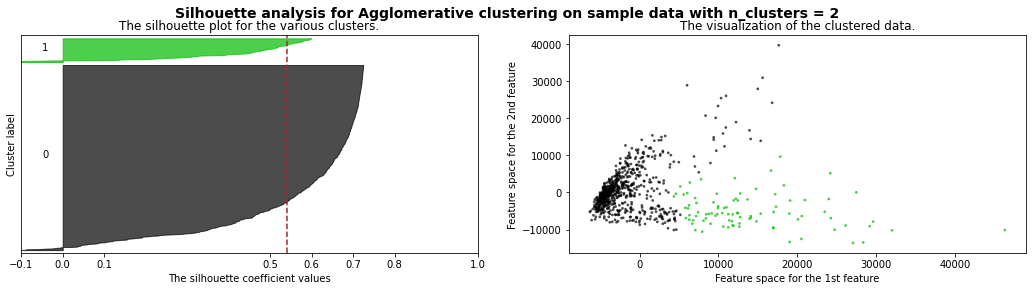

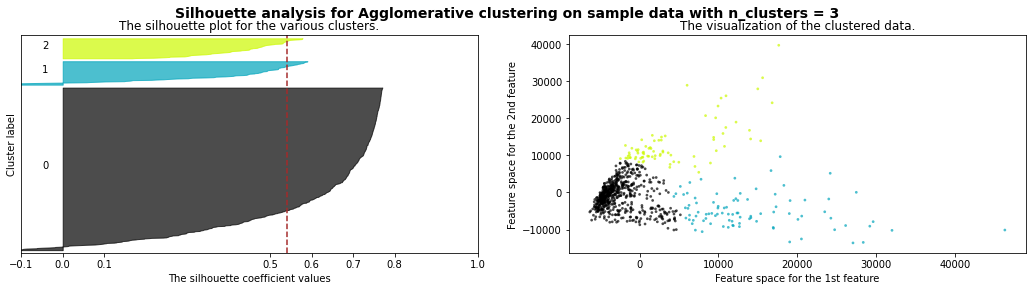

In [22]:
import matplotlib.cm as cm
for n_clusters in range (2,4):
    fig,(ax1,ax2)= plt.subplots(1,2,figsize=(18,4))
    ax1.set_xlim([-0.1, 1])    
    ax1.set_ylim([0, len(dfc_pca)+(n_clusters+1)*10])  #The (n_clusters+1)*10 is for inserting blank space between silhouette.
    agc = AgglomerativeClustering(n_clusters=n_clusters)
    agc_labels = agc.fit_predict(dfc_pca)
    sl_score_agc=silhouette_score(dfc_pca,agc_labels)
    print("For n_clusters =", n_clusters,"\nThe average silhouette_score is :", sl_score_agc)
    sample_silhouette_values = silhouette_samples(dfc_pca, agc_labels) # Compute the silhouette scores for each sample

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = \
                        sample_silhouette_values[agc_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower,y_upper),0,ith_cluster_silhouette_values,facecolor=color,edgecolor=color,alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i)) #Label silhouette plots with their cluster no.s at the middle
        y_lower = y_upper + 10  # 10 for the 0 samples # Compute the new y_lower for next plot

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=sl_score, color="brown", linestyle="--") # The vertical line for average silhouette score of all the values
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1,0.0,0.1,0.5, 0.6, 0.7, 0.8,1.0])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(agc_labels.astype(float) / n_clusters)
    ax2.scatter(dfc_pca[:,0],dfc_pca[:,1], marker='.', s=30, lw=0, alpha=0.7,c=colors, edgecolor='k')
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for Agglomerative clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [23]:
agc=AgglomerativeClustering(n_clusters=2)
agc.fit(dfc_pca)

AgglomerativeClustering()

In [24]:
dfc['cluster_ID_KM']=km.labels_
dfc['cluster_ID_AG']=agc.labels_
dfc

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,cluster_ID_KM,cluster_ID_AG
0,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1,0
1,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1,0
2,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1,0
3,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1,0
4,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,0,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40,1,0
773,1,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83,1,0
774,1,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49,1,0
775,1,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99,0,0


In [25]:
from sklearn.metrics import confusion_matrix, classification_report
print("Confusion matrix and Classification report after using KMeans Clustering")
print(confusion_matrix(dfc['Private'],dfc['cluster_ID_KM']))
print(classification_report(dfc['Private'],dfc['cluster_ID_KM']))

Confusion matrix and Classification report after using KMeans Clustering
[[ 75 137]
 [ 34 530]]
              precision    recall  f1-score   support

           0       0.69      0.35      0.47       212
           1       0.79      0.94      0.86       564

    accuracy                           0.78       776
   macro avg       0.74      0.65      0.66       776
weighted avg       0.77      0.78      0.75       776



* Good to see 78% accuracy using Kmeans Clustering.

In [26]:
print("Confusion matrix and Classification report after using Agglomerative Clustering")
print(confusion_matrix(dfc['Private'],dfc['cluster_ID_AG']))
print(classification_report(dfc['Private'],dfc['cluster_ID_AG']))

Confusion matrix and Classification report after using Agglomerative Clustering
[[137  75]
 [550  14]]
              precision    recall  f1-score   support

           0       0.20      0.65      0.30       212
           1       0.16      0.02      0.04       564

    accuracy                           0.19       776
   macro avg       0.18      0.34      0.17       776
weighted avg       0.17      0.19      0.11       776



* Agglomerative Heirarichal clustering has not been found good with 19% of accuracy.